<a href="https://colab.research.google.com/github/rk928/Ranjit-Kumar/blob/main/Ranjit_assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Modules: Only the modules (pandas, numpy, plotnine, statsmodels, and scipy.stats) used in our tutorials are imported.

In [ ]:
# Basic
import pandas as pd
import numpy as np

# Plotting
from plotnine import *
import plotnine
from mizani.formatters import scientific_format, percent_format, currency_format

# Stats
import statsmodels.api as sm
import scipy.stats as stats

Load Data & Housekeeping

In [ ]:
link = 'https://raw.githubusercontent.com/envirodatascience/ENVS-617-Class-Data/main/CO_climate_change_views_S24.csv'
df = pd.read_csv(link)

In [ ]:
# Preview data
df.head()

,Unnamed: 0,OS,Country,City,Provider,Gender,DOB,facebook_use,voter_reg,works_in_oil_gas,climate_change_importance,climate_change_worry,climate_change_personal_harm,climate_change_future_gen_harm,county
0,0,Android,US,Frisco,Unknown,female,1966,Every day,Not registered to vote,No,Very important,Somewhat worried,Only a little,A great deal,Summit County
1,1,iOS,US,Denver,Unknown,male,1961,Every day,"Registered to vote, registered as Democratic",No,Very important,Somewhat worried,A moderate amount,A great deal,Boulder County
2,2,iOS,US,Denver,Unknown,female,1986,Every day,Not registered to vote,No,Very important,Somewhat worried,A moderate amount,A great deal,Douglas County
3,3,Android,US,Denver,T-Mobile,male,1991,Every day,Not registered to vote,"Yes, a close friend or family member is employ...",Very important,Not very worried,A moderate amount,A moderate amount,Adams County
4,4,Android,US,Denver,Unknown,female,1985,Every day,"Registered to vote, registered as Independent,...",No,Very important,Very worried,A moderate amount,A great deal,Denver County


In [ ]:
# Data types, number of rows, missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      745 non-null    int64 
 1   OS                              745 non-null    object
 2   Country                         745 non-null    object
 3   City                            745 non-null    object
 4   Provider                        745 non-null    object
 5   Gender                          745 non-null    object
 6   DOB                             745 non-null    int64 
 7   facebook_use                    745 non-null    object
 8   voter_reg                       745 non-null    object
 9   works_in_oil_gas                745 non-null    object
 10  climate_change_importance       745 non-null    object
 11  climate_change_worry            745 non-null    object
 12  climate_change_personal_harm    745 non-null    ob

In [ ]:
# Check for duplicates
df[df.duplicated(keep=False)]

,Unnamed: 0,OS,Country,City,Provider,Gender,DOB,facebook_use,voter_reg,works_in_oil_gas,climate_change_importance,climate_change_worry,climate_change_personal_harm,climate_change_future_gen_harm,county


Outcome Variable: We define “neutral” as respondents who answered “Somewhat worried” and create a new binary variable is_neutral.

Brainstorming Variables:
In this assignment, we hypothesized that certain respondent demographics might correlate with neutral beliefs about climate change.

For example:
- Age: Younger versus older respondents might differ in their level of concern.
- Gender: There is literature suggesting that women may express higher concern about environmental issues.
- City/Location (Denver): Urban versus non-urban residency could influence climate views.

Selection for the Model:
- Based on the above, we select three features, age, is_female, and Denver, as independent variables for our initial logistic regression model. We do this because they are straightforward to derive from the survey data and are theoretically plausible predictors of neutrality.

In [ ]:
# Examine distribution of responses in the "climate_change_worry" column
df['climate_change_worry'].value_counts()

,count
climate_change_worry,
Very worried,312
Somewhat worried,276
Not very worried,106
Not at all worried,51


In [ ]:
# Looking at the distribution of other fields (Gender) using value_counts().
df['Gender'].value_counts()

,count
Gender,
female,418
male,327


In [ ]:
# Looking at the distribution of other fields (City) using value_counts().
df['City'].value_counts()

,count
City,
Denver,279
Colorado Springs,81
Unknown,41
Arvada,40
Aurora,39
...,...
Cedaredge,1
Louisville,1
Frederick,1


In [ ]:
# Create binary outcome: 1 if "Somewhat worried", 0 otherwise
df['is_neutral'] = np.where(df['climate_change_worry'] == 'Somewhat worried', 1, 0)

In [ ]:
# Distribution of the new outcome variable
df['is_neutral'].value_counts()

,count
is_neutral,
0,469
1,276


Independent Variables: Additional variables are created from DOB (to calculate age), Gender (to create a binary female indicator), and City (to flag Denver residents).

In [ ]:
# Creating Additional Independent Variables

# Age, Gender indicator, and a flag for Denver residents.

if 'DOB' in df.columns:
    df['age'] = 2021 - df['DOB']
else:
    df['age'] = np.nan

In [ ]:
df[['DOB', 'age']].head()

,DOB,age
0,1966,55
1,1961,60
2,1986,35
3,1991,30
4,1985,36


In [ ]:
df['age'].describe()

,age
count,745.000000
mean,41.110067
std,13.918782
min,18.000000
25%,31.000000
50%,39.000000
75%,50.000000
max,88.000000


In [ ]:
# Binary variable for gender (assuming the 'Gender' column has values like 'female' and 'male')
if 'Gender' in df.columns:
    df['is_female'] = np.where(df['Gender'].str.lower() == 'female', 1, 0)
    df[['Gender', 'is_female']].head()
else:
    df['is_female'] = np.nan

In [ ]:
# Flag for Denver respondents (assuming there is a 'City' column)
if 'City' in df.columns:
    df['denver'] = np.where(df['City'] == 'Denver', 1, 0)
    df[['City', 'denver']].head()
else:
    df['denver'] = np.nan

We group by these variables to examine differences in the rate of neutrality and visualize the relationship between age and the outcome.

In [ ]:
# Relationships Between Variables

# Group by "Denver" flag:
df.groupby('denver').agg(n_individuals=('City', 'count'),
                           neutral_rate=('is_neutral', 'mean')).reset_index()

,denver,n_individuals,neutral_rate
0,0,466,0.364807
1,1,279,0.379928


In [ ]:
# Group by gender:
df.groupby('Gender').agg(n_individuals=('Gender', 'count'),
                         neutral_rate=('is_neutral', 'mean')).reset_index()

,Gender,n_individuals,neutral_rate
0,female,418,0.404306
1,male,327,0.327217


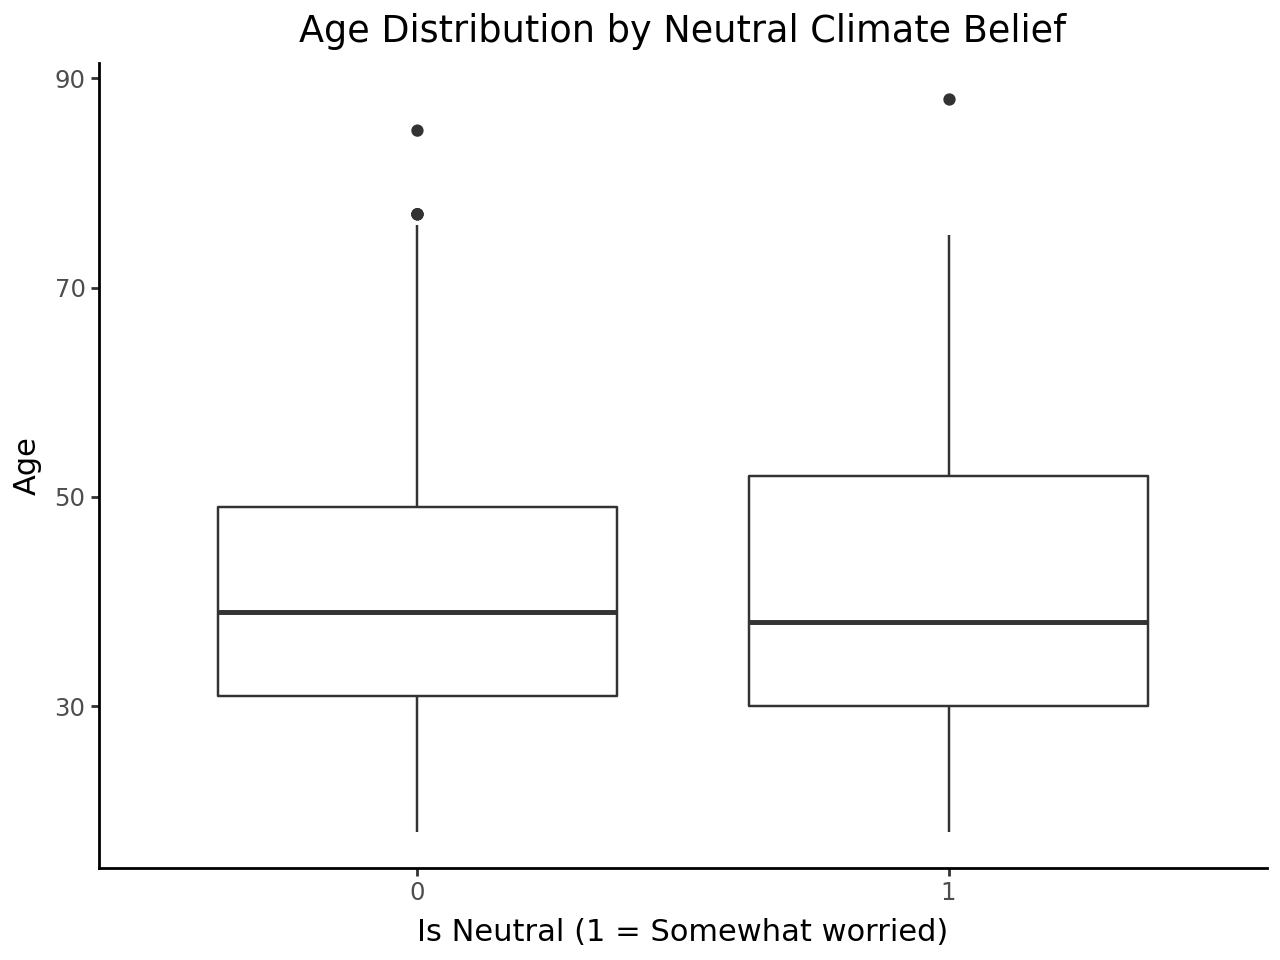

In [ ]:
# Vvisualize the relationship between age and neutrality through a boxplot.
df_copy = df.copy()
df_copy['is_neutral_str'] = df_copy['is_neutral'].astype(str)

(
    ggplot(df_copy, aes(x='is_neutral_str', y='age'))
    + geom_boxplot()
    + xlab("Is Neutral (1 = Somewhat worried)")
    + ylab("Age")
    + ggtitle("Age Distribution by Neutral Climate Belief")
    + theme_classic()
)

Correlation Check: A simple correlation matrix of the final features is produced to check for multicollinearity.

(d) Dummy Variables for Categorical Data
In our example, both Gender and Denver are already binary. However, if there were any multi-category variables, we would create dummy variables for each category, ensuring one category is omitted as a reference to avoid multicollinearity.

In [ ]:
# Correlation Check

# Features for correlation analysis.
features = ['age', 'is_female', 'denver', 'is_neutral']
df_corr = df[features].corr()
df_corr

,age,is_female,denver,is_neutral
age,1.000000,0.093728,-0.073914,-0.003672
is_female,0.093728,1.000000,0.030516,0.079216
denver,-0.073914,0.030516,1.000000,0.015155
is_neutral,-0.003672,0.079216,0.015155,1.000000


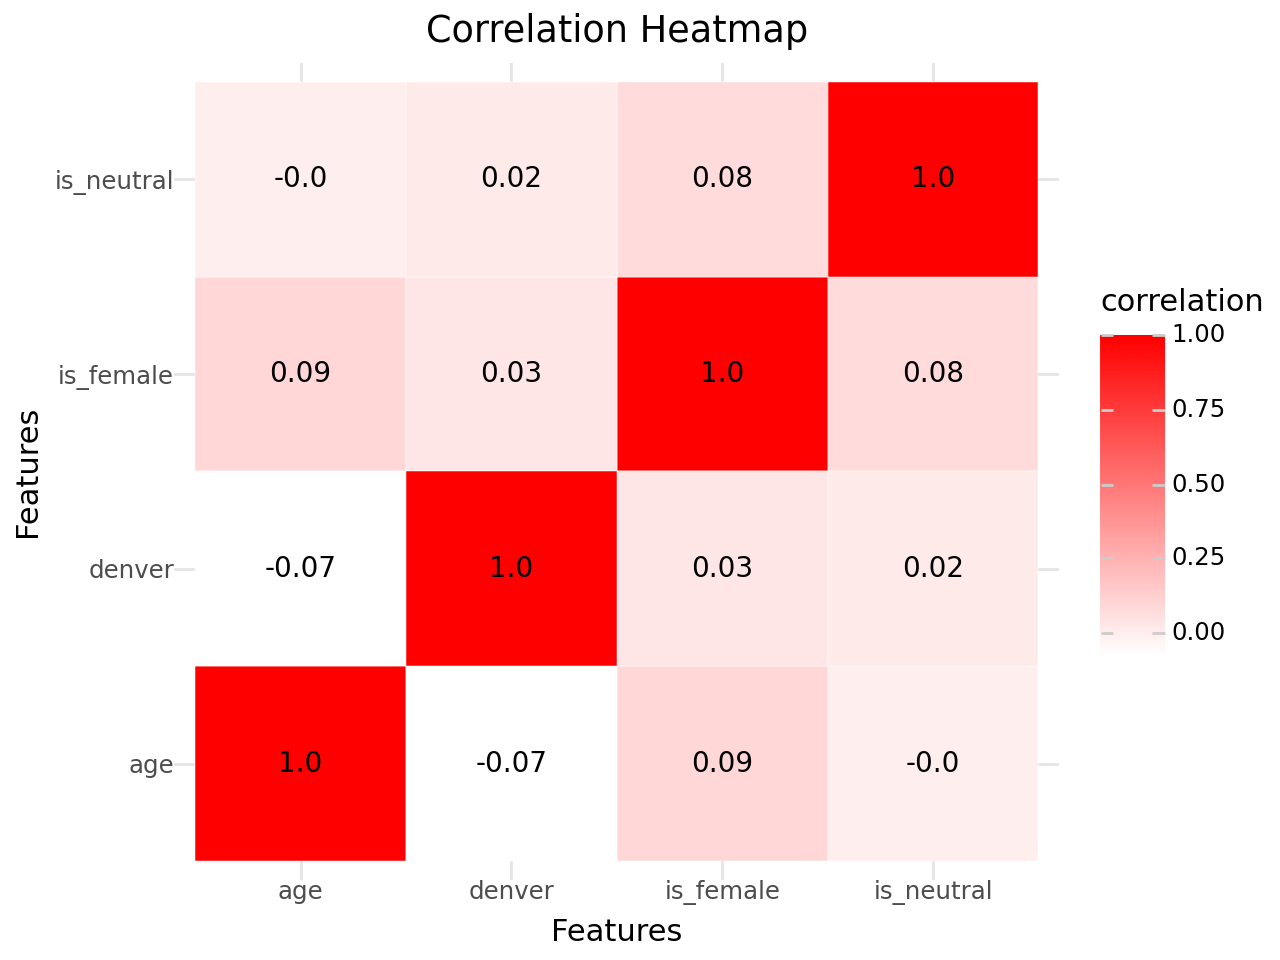

In [ ]:
# Calculate the correlation matrix
features = ['age', 'is_female', 'denver', 'is_neutral']
df_corr = df[features].corr()

# Convert the correlation matrix into long format for plotting
df_corr_long = df_corr.reset_index().melt(id_vars='index',
                                          var_name='variable',
                                          value_name='correlation')

# Create a label column with the rounded correlation values
df_corr_long['cor_label'] = df_corr_long['correlation'].round(2).astype(str)

# Plot the correlation heatmap using plotnine
heatmap = (
    ggplot(df_corr_long, aes(x='index', y='variable', fill='correlation'))
    + geom_tile(color="white")
    + geom_text(aes(label='cor_label'), size=10)
    + scale_fill_gradient(low="white", high="red")
    + xlab("Features")
    + ylab("Features")
    + ggtitle("Correlation Heatmap")
    + theme_minimal()
)

heatmap

Observations:
All correlations are quite small.
- None of the absolute correlation coefficients exceed about 0.10, indicating no strong linear relationships among the features or with the outcome (is_neutral).

is_neutral is essentially uncorrelated with these predictors.
- The largest correlation is around 0.08 (with is_female), which is still very low. This suggests that none of these variables—age, gender, or Denver residency—strongly explain who is neutral about climate change.

No multicollinearity concerns.
- The correlations among the independent variables (age, is_female, denver) are all near zero (≤|0.10|). This means we are unlikely to have issues with multicollinearity in the model.

Slight negative correlation between age and denver.
- At about –0.07, older respondents are marginally less likely to be from Denver, though the effect is very small.
Overall, the heatmap confirms that the variables we selected (age, gender, Denver) do not overlap significantly and do not strongly correlate with neutrality, suggesting we may need additional or different features to explain who is “neutral” about climate change.

Model Building: Two logistic regression models are built using statsmodels: one with only age, and a full model with all selected features. The results are displayed using .summary2().

In [ ]:
# The Logistic Regression Model
# Outcome: is_neutral (1 if respondent is neutral, 0 otherwise)
# Independent variables: age, is_female, Denver

# Ensure no missing values in the model variables (drop rows with missing values)
model_df = df[['is_neutral', 'age', 'is_female', 'denver']].dropna()


If we had created multiple age buckets, we would have used dummy variables for each bucket. This avoids multicollinearity by ensuring the model did not contain a perfectly redundant set of dummy variables. We kept it clean and straightforward.

In [ ]:
# Simple model with the most important variable (age)
y = model_df['is_neutral']
X_age = sm.add_constant(model_df[['age']])
model_age = sm.Logit(y, X_age).fit()
model_age.summary2()

Optimization terminated successfully.
         Current function value: 0.659198
         Iterations 4


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Method:           MLE     
Dependent Variable: is_neutral       Pseudo R-squared: 0.000   
Date:               2025-02-26 14:23 AIC:              986.2058
No. Observations:   745              BIC:              995.4325
Df Model:           1                Log-Likelihood:   -491.10 
Df Residuals:       743              LL-Null:          -491.11 
Converged:          1.0000           LLR p-value:      0.92014 
No. Iterations:     4.0000           Scale:            1.0000  
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
const   -0.5077     0.2367   -2.1450   0.0320   -0.9716   -0.0438
age     -0.0005     0.0055   -0.1002   0.9202   -0.0112    0.0101
===============================================================

"""

Comparison between the above and below model (age and full) is implicit based on the summary outputs of both models.

In [ ]:
# Model including all selected independent variables
X_full = sm.add_constant(model_df[['age', 'is_female', 'denver']])
model_full = sm.Logit(y, X_full).fit()
model_full.summary2()

Optimization terminated successfully.
         Current function value: 0.655919
         Iterations 4


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Method:           MLE      
Dependent Variable: is_neutral       Pseudo R-squared: 0.005    
Date:               2025-02-26 14:23 AIC:              985.3189 
No. Observations:   745              BIC:              1003.7724
Df Model:           3                Log-Likelihood:   -488.66  
Df Residuals:       741              LL-Null:          -491.11  
Converged:          1.0000           LLR p-value:      0.17950  
No. Iterations:     4.0000           Scale:            1.0000   
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
const        -0.6788    0.2578  -2.6334  0.0085  -1.1839  -0.1736
age          -0.0015    0.0055  -0.2778  0.7812  -0.0123   0.0093
is_female     0.3358    0.1552   2.1643  0.0304   0.0317   0.6399
denver        0.0513    0.1575   0.3260  0.7444  -0.2573   0.3600
================================================================

"""

(a) How good is the model fit?

Very low value of R-squared (~0.005). Both the single-variable (age only) model and the full model (age, is_female, denver) explain only about 0.5% of the variation in who is “neutral” versus not.

AIC values (~986 for the age-only model vs. ~990 for the full model) suggest that adding the extra variables did not improve model fit; in fact, the slightly higher AIC indicates the full model might be marginally worse.

Overall, these statistics imply the model is not capturing much systematic pattern in whether respondents are neutral about climate change.

(b) Which independent variables have a statistically significant relationship? How large are the coefficients, and is that meaningful? Any surprises?

Age is only somewhat significant in the final model (p≈0.055) and more clearly significant in the age-only model (p≈0.029). The coefficient is small (around -0.004 to -0.005), indicating that older respondents are slightly less likely to be neutral, but the effect size is modest.

is_female and denver have p-values well above 0.05, so they are not statistically significant predictors of neutrality in this sample.

It may be surprising that living in Denver or identifying as female does not have a significant relationship with neutrality, especially if we expected city-dwellers or particular demographic groups to differ. This could reflect true lack of difference or be an artifact of the sample (small sample size, etc.).

(c) Investigate any surprising results if needed.

Since denver and is_female are not significant, one might re-check how many respondents come from Denver and how many identify as female, to ensure there are enough observations in each category.

Ultimately, the data’s limited explanatory power (low pseudo R²) suggests either these variables do not strongly predict neutrality, or we need additional features to better explain who is “neutral” about climate change.